# Chess Pieces Optimization #

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

<!-- The first few sentences should give a quick overview of the entire project. Then, elaborate with a description of the problem that will be solved, a brief history (with [citations](https://en.wikipedia.org/wiki/Citation)) of how the problem came about, why it's important/interesting, and any other interesting facts you'd like to talk about. You should address and explain where the problem data is coming from (research? the internet? synthetically generated?) Also give an outline of the rest of the report. -->
<!-- 
This section should be 300-600 words long, and **should be accessible to a general audience** (don't assume your reader has taken the class!). Feel free to include images if you think it'll be helpful:
![fixit flowchart][flow]

For more help on using Markdown, see [this reference](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

[flow]: https://s-media-cache-ak0.pinimg.com/736x/f5/75/c5/f575c53b93724808c6f0211890a54900.jpg -->

### The Game of Chess
Chess is a two-player game of strategy and tactics on an 8x8 checkered board. The game's goal is to checkmate or capture your opponent's king. A game might also conclude in a draw, in which neither player wins, or it can be won if your opponent gives up (in chess, it is called "resigning"). 

### Chess-terms

There are <b> six types of pieces in chess, namely pawn(P), knight(N), bishop(B), rook(R), queen(Q), and king(K)</b>. 
Note - Since, pawn movements are color dependent (Black or White), and our problem statement is color independent, <b> we are not considering pawns in our problem statement. </b>

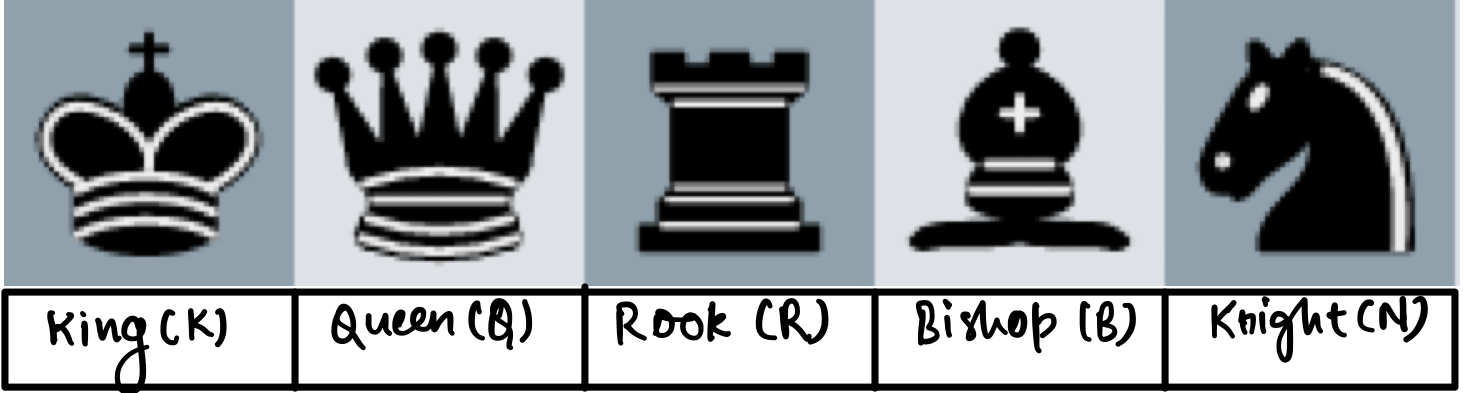


### Piece movements
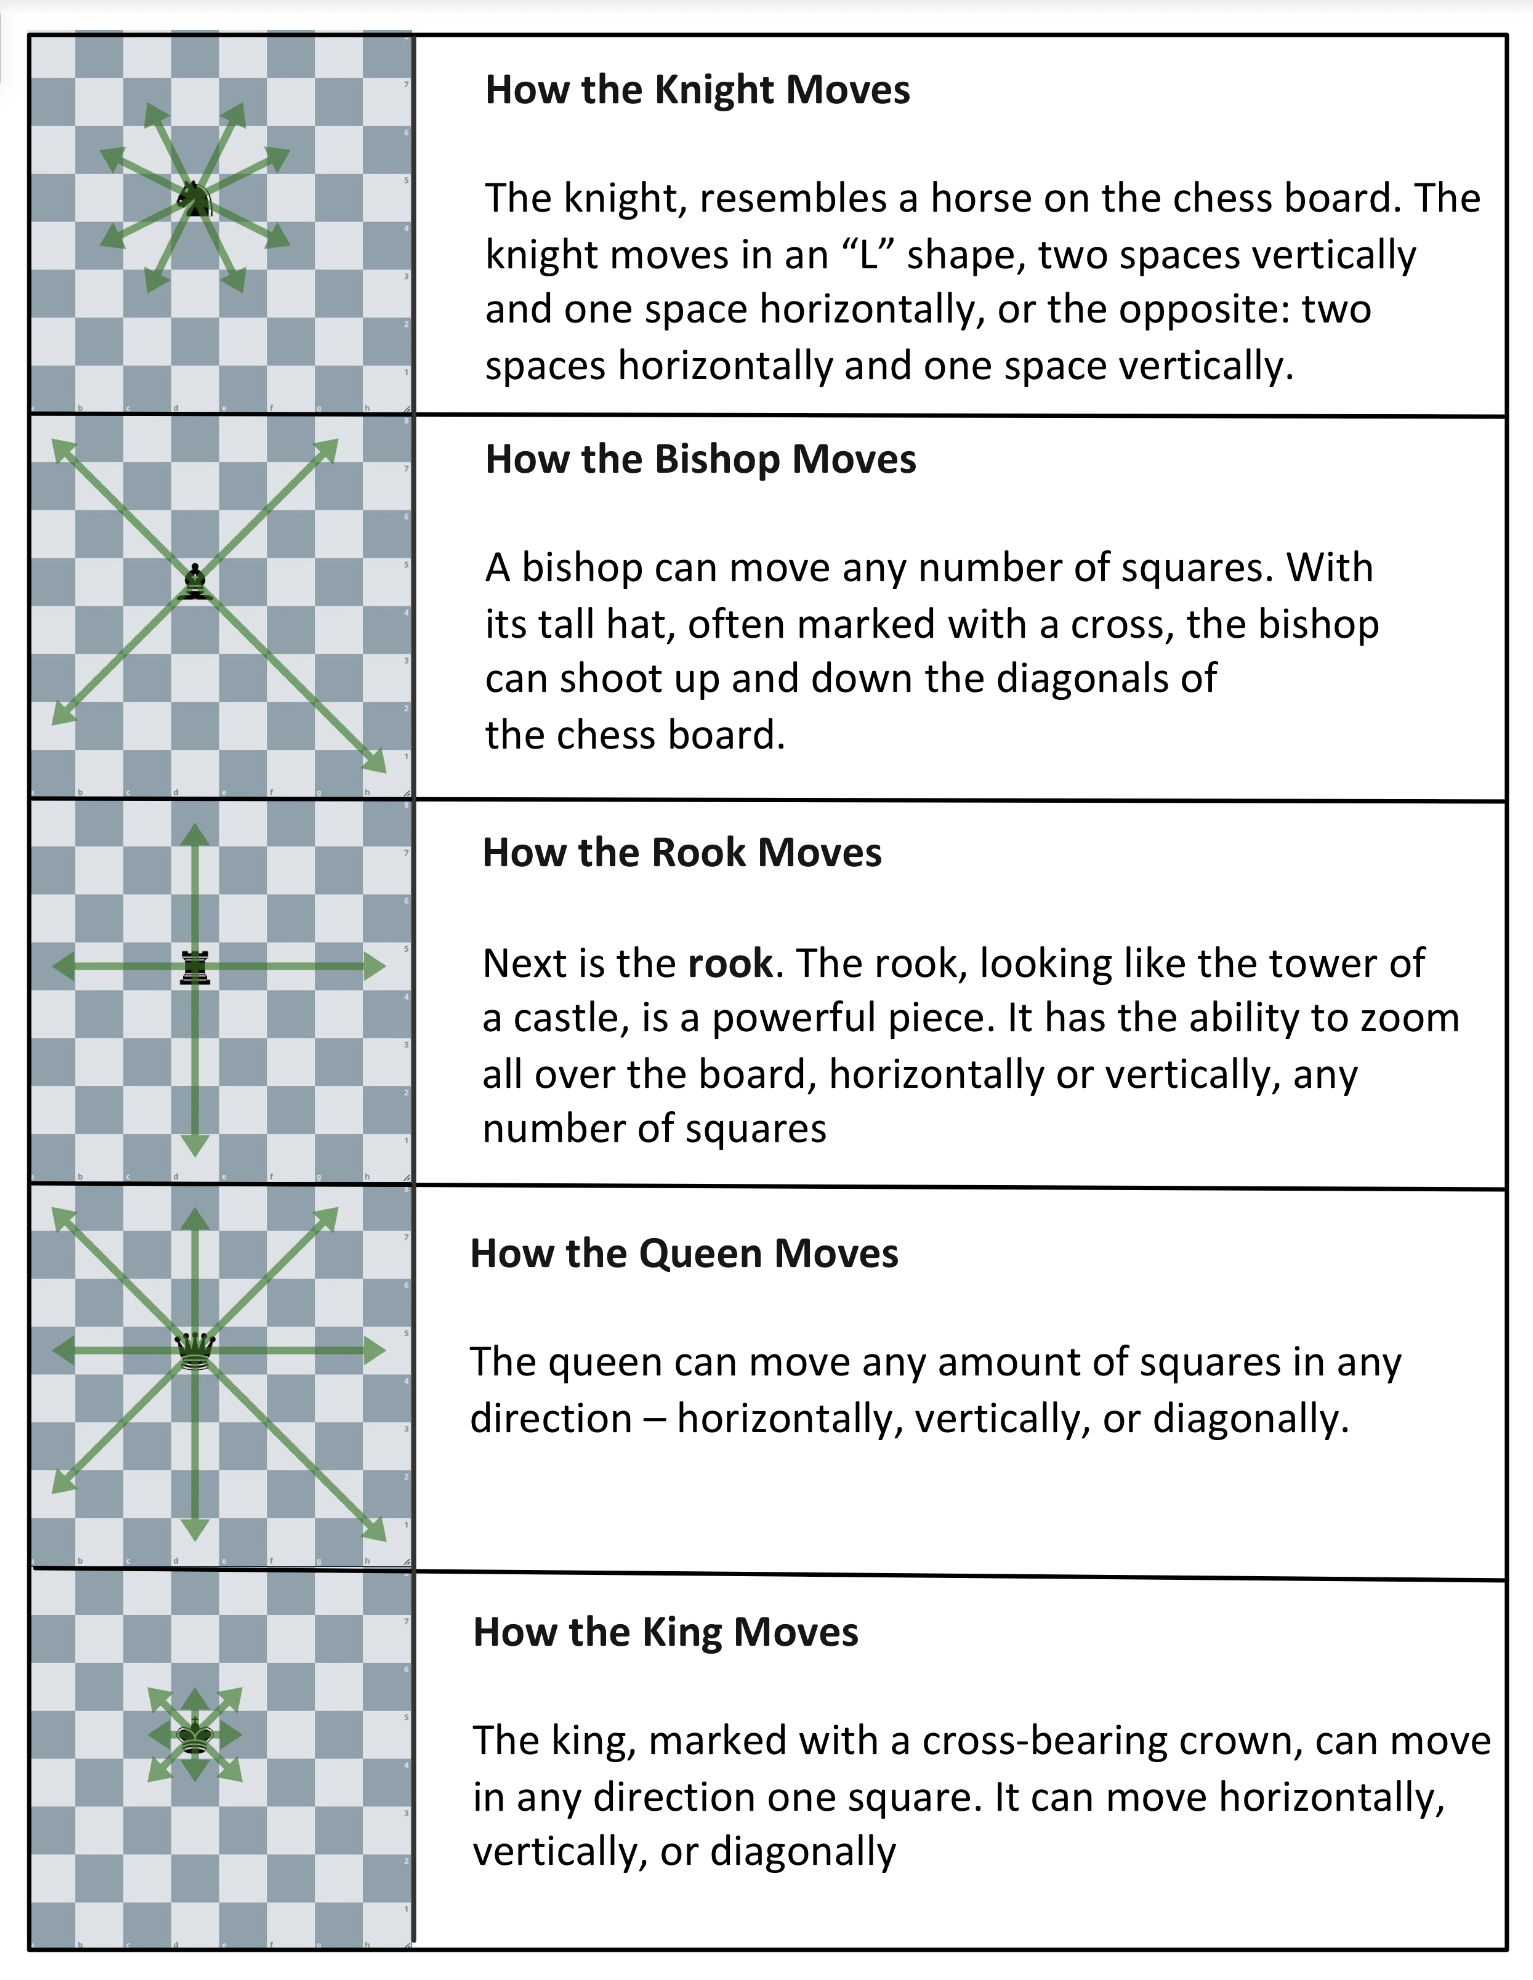

### Problem Statement

In this project, our main goal is to optimize the maximum number of chess piece that can be put on a  $(N*N)$ chess board along with their location on the chess board such that no chess piece threaten any other chess piece. To accomplish this task, we will be using Mixed Integer program <b>(MIP)</b>.

The N Queens Problem is a classical intractable problem, which is often used in case of discussing about various types of searching problems. In general, the goal is to place N number of queens on the $(N*N)$ matrix so that no two queens can threaten one another. According to the rule of this problem, a queen can move in either along a row, along a column, or along a diagonal. In an $(N*N)$ matrix, each of the N queens will be located on precisely one row, one column, and two diagonals. The problem of finding all solutions to the 8-queens problem can be quite computationally expensive, as there are 4,426,165,368 possible arrangements of eight queens on an 8×8 board, but only 92 solutions.

In this project, instead of just placing queens on a chess board, we will be placing the maximum number of knights (N), bishop(B), rook(R), queen(Q), and king(K). We will also find the locations of these chess pieces so that no chess piece threatens any other chess piece. All the chess piece movements follow their movements as per the chess rules.<br/>
This is interesting because building such an optimization model could solve N-Queens and many other more straightforward chess-piece-positioning problems (as discussed in our derived problem statement).

#### A) Main 
In our Main problem statement, we try to build a generalized optimization model that finds the maximum number of chess pieces one can place on an NxN chessboard so that no piece attacks any other, and the total number of pieces of each type lies in a particular range.

#### B) Derived
In our Derived problem statement, we try to find the maximum number of pieces of a particular type (one among N, B, R, Q, K) that one can place on an NxN chessboard so that no piece attacks any other. This essentially means solving N-Queens for piece type Q, N-Rooks for piece type R, and so on.

One can easily observe that our derived problem statement can be solved using our main model and changing the data (allowing any amount of the piece of interest and only 0 of other types.)

In the sections below, detailed math models, solution code, discussion and conclusion of the project will be displayed.

### Assumptions
Before we start, <b>please note that we pad our NxN board to become size (N+4)x(N+4)</b> to easily handle boundary constraints for knight move.
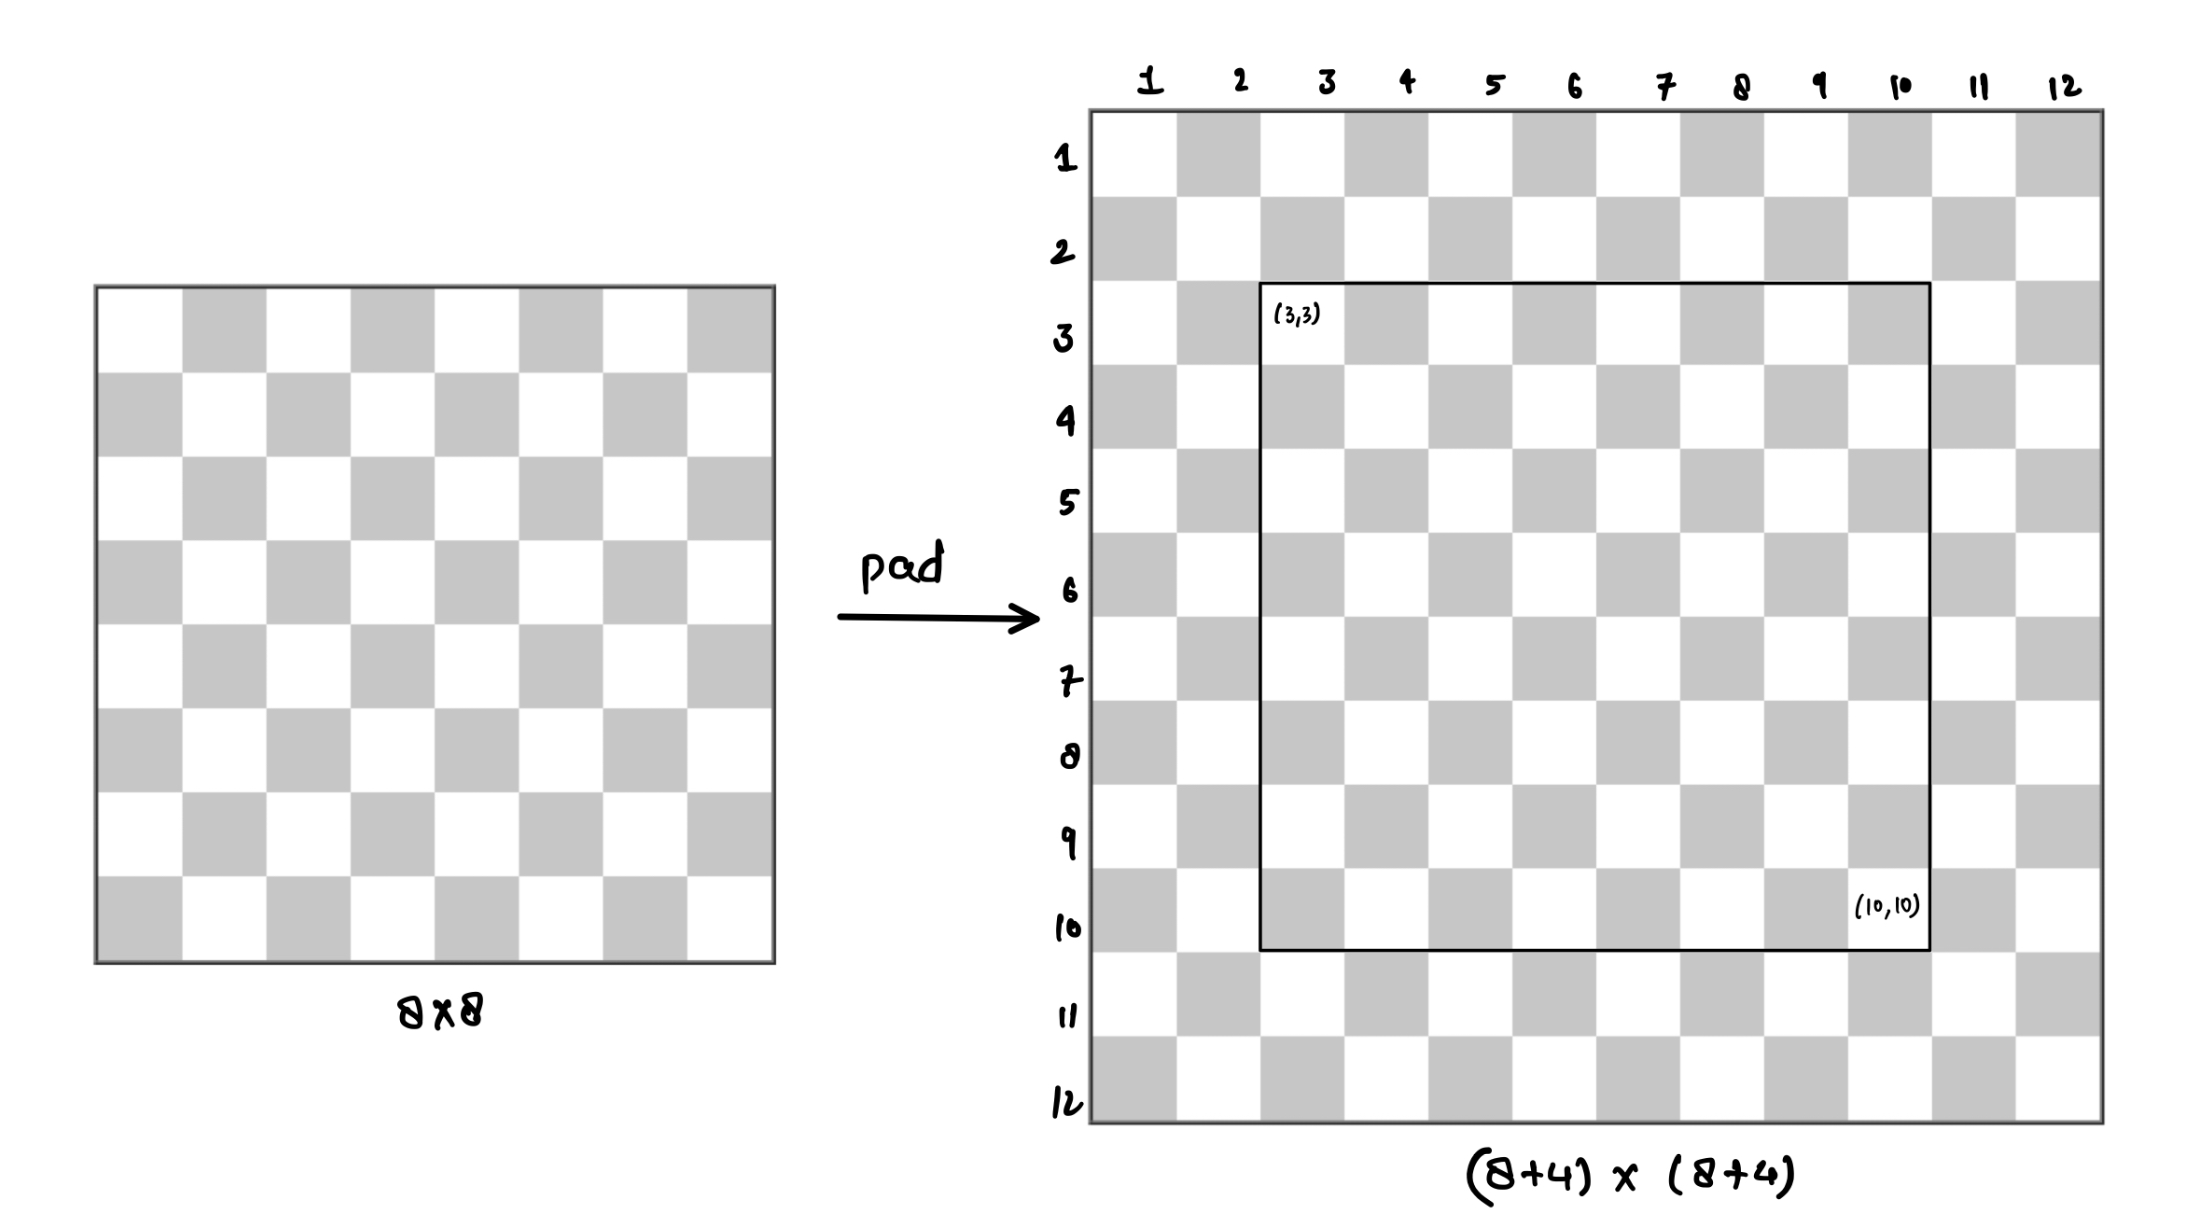

## 2. Mathematical model ##

The problem we are trying to solve is a Mixed Integer program <b>(MIP)</b> from <b>Game Theory</b>. This is because we are given a set of locations, and we must decide which piece should be placed at which location (if any). Thus we can employ our decision variables as a set of locations where every location gets a value from a set of different (finite) values. Although we have formulated a slightly different solution than this approach, and we will talk more about it later. 

### Data:

- <b>$N$</b>: length (and width) of the chessboard. Overall, the chessboard will be of size NxN.
- <b>$pieces = [:N, :B, :R, :K, :Q]$</b>: the list of major chess pieces namely knight(N), Bishop(B), Rook(R), Queen(Q), and King(K) respectively
- <b>$min\_pieces = [N_{min}, B_{min}, R_{min}, K_{min}, Q_{min}]$</b>: minimum number of pieces of each type that must be placed on the chessboard corresponding to each of the pieces.
- <b>$max\_pieces = [N_{max}, B_{max}, R_{max}, K_{max}, Q_{max}]$</b>: maximum number of pieces of each type that can be placed on the chessboard corresponding to each of the pieces.


### Decision variables:

Intuitively, we can employ our decision variables as a set of locations where every location gets a value from a set of different (finite) values corresponding to different pieces. 
However, we have used slightly different decision variables to simplify the constraints. Here, <b>we use (N+4)x(N+4) variables for each piece</b> where each individual variable can either be 0 or 1 (binary), representing whether the corresponding piece is placed on that square or not. This innately means we place each piece on a different (pseudo) board and apply constraints on the overlapped board.

- $n_{i,j} \in \{0,1\}$: representing the knight board where $i \in \{1,2,...,N+4\} \text{ and } j \in \{1,2,...,N+4\}$. If $n_{i,j} == 1$, this means that a knight is placed on the $(i,j)$ square.
- $b_{i,j} \in \{0,1\}$: representing the bishop board where $i \in \{1,2,...,N+4\} \text{ and } j \in \{1,2,...,N+4\}$. If $b_{i,j} == 1$, this means that a bishop is placed on the $(i,j)$ square.
- $r_{i,j} \in \{0,1\}$: representing the rook board where $i \in \{1,2,...,N+4\} \text{ and } j \in \{1,2,...,N+4\}$. If $r_{i,j} == 1$, this means that a rook is placed on the $(i,j)$ square.
- $q_{i,j} \in \{0,1\}$: representing the queen board where $i \in \{1,2,...,N+4\} \text{ and } j \in \{1,2,...,N+4\}$. If $q_{i,j} == 1$, this means that a queen is placed on the $(i,j)$ square.
- $k_{i,j} \in \{0,1\}$: representing the king board where $i \in \{1,2,...,N+4\} \text{ and } j \in \{1,2,...,N+4\}$. If $k_{i,j} == 1$, this means that a king is placed on the $(i,j)$ square.

### Objective:

We want to maximize the number of pieces we can place on the board. Hence, the objective will be
$$\begin{aligned}
  \underset{n,b,r,q,k}{\text{maximize}}\qquad& \sum_{i \in \{1,2,...,N+4\} \text{ & } j \in \{1,2,...,N+4\}} (n_{i,j}+b_{i,j}+r_{i,j}+q_{i,j}+k_{i,j}) \\
\end{aligned}$$

### Constraints:

1. Bound constraints: Total pieces of each type should be in the given range.
$$\begin{aligned}
N_{min} &\leq \sum_{i \in \{1,2,...,N+4\}, j \in \{1,2,...,N+4\}}n_{i,j} \leq & N_{max}\\
B_{min} &\leq \sum_{i \in \{1,2,...,N+4\}, j \in \{1,2,...,N+4\}}b_{i,j} \leq & B_{max}\\
R_{min} &\leq \sum_{i \in \{1,2,...,N+4\}, j \in \{1,2,...,N+4\}}r_{i,j} \leq & R_{max}\\
Q_{min} &\leq \sum_{i \in \{1,2,...,N+4\}, j \in \{1,2,...,N+4\}}q_{i,j} \leq & Q_{max}\\
K_{min} &\leq \sum_{i \in \{1,2,...,N+4\}, j \in \{1,2,...,N+4\}}k_{i,j} \leq & K_{max}\\
\end{aligned}$$

2. Padding constraints: No piece should be placed on a padded square.
$$\begin{aligned}
n_{i,j}==0 & &\forall i \in \{1,2,...,N+4\} \text{ & } j \in \{1,2,N+3,N+4\} \\
n_{i,j}==0 & &\forall i \in \{1,2,N+3,N+4\} \text{ & } j \in \{1,2,...,N+4\} \\
b_{i,j}==0 & &\forall i \in \{1,2,...,N+4\} \text{ & } j \in \{1,2,N+3,N+4\} \\
b_{i,j}==0 & &\forall i \in \{1,2,N+3,N+4\} \text{ & } j \in \{1,2,...,N+4\} \\
r_{i,j}==0 & &\forall i \in \{1,2,...,N+4\} \text{ & } j \in \{1,2,N+3,N+4\} \\
r_{i,j}==0 & &\forall i \in \{1,2,N+3,N+4\} \text{ & } j \in \{1,2,...,N+4\} \\
q_{i,j}==0 & &\forall i \in \{1,2,...,N+4\} \text{ & } j \in \{1,2,N+3,N+4\} \\
q_{i,j}==0 & &\forall i \in \{1,2,N+3,N+4\} \text{ & } j \in \{1,2,...,N+4\} \\
k_{i,j}==0 & &\forall i \in \{1,2,...,N+4\} \text{ & } j \in \{1,2,N+3,N+4\} \\
k_{i,j}==0 & &\forall i \in \{1,2,N+3,N+4\} \text{ & } j \in \{1,2,...,N+4\} \\
\end{aligned}$$


3. Overlap constraints: For every location, not more than one piece can be placed at that location.
$$\begin{aligned}
n_{i,j}+b_{i,j}+r_{i,j}+q_{i,j}+k_{i,j}<=1 & &\forall i \in \{1,2,...,N+4\} \text{ & } j \in \{1,2,...,N+4\}
\end{aligned}$$


4. Piece attack constraints: If a piece is placed at a location, no other piece can be placed on a square that this piece can directly attack (in 1 move).

    - Knight attack constraints
    
 $$\begin{aligned}
(n_{i,j} == 1) => \sum_\underset{{(k_x,k_y) \in \{(1, 2), (2, 1), (2, -1), (1, -2), (-1, -2), (-2, -1), (-2, 1), (-1, 2)\}}}({n_{i+k_x,j+k_y}+b_{i+k_x,j+k_y}+r_{i+k_x,j+k_y}+q_{i+k_x,j+k_y}+k_{i+k_x,j+k_y})==0} \\
    \forall i \in \{3,4,...,N+2\} & \text{ & } j \in \{3,4,...,N+2\}\\
\end{aligned}$$ 

    - Bishop attack constraints
    
$$\begin{aligned}
(b_{i,j} == 1) => \sum_{(\hat{i},\hat{j}) \in \{1,2,...,N+4\} \times \{1,2,...,N+4\}: \hat{i}-i == \hat{j} - j}{n_{\hat{i},\hat{j}}+b_{\hat{i},\hat{j}}+r_{\hat{i},\hat{j}}+q_{\hat{i},\hat{j}}+k_{\hat{i},\hat{j}}}<=1 & &\forall i \in \{3,4,...,N+2\} \text{ & } j \in \{3,4,...,N+2\}\\
\end{aligned}$$  

 $$\begin{aligned}
(b_{i,j} == 1) => \sum_{(\hat{i},\hat{j}) \in \{1,2,...,N+4\} \times \{1,2,...,N+4\}: i - \hat{i} == \hat{j} - j}{n_{\hat{i},\hat{j}}+b_{\hat{i},\hat{j}}+r_{\hat{i},\hat{j}}+q_{\hat{i},\hat{j}}+k_{\hat{i},\hat{j}}}<=1 & &\forall i \in \{3,4,...,N+2\} \text{ & } j \in \{3,4,...,N+2\}\\
\end{aligned}$$  

    - Rook attack constraints
    
$$\begin{aligned}
(r_{i,j} == 1) => \sum_{\hat{j} \in \{1,2,...,N+4\}}{n_{i,\hat{j}}+b_{i,\hat{j}}+r_{i,\hat{j}}+q_{i,\hat{j}}+k_{i,\hat{j}}}<=1 & &\forall i \in \{3,4,...,N+2\} \text{ & } j \in \{3,4,...,N+2\}\\
\end{aligned}$$  

$$\begin{aligned}
(r_{i,j} == 1) => \sum_{\hat{i} \in \{1,2,...,N+4\}} { n_{\hat{i},j} + b_{\hat{i},j} + r_{\hat{i},j} + q_{\hat{i},j} + k_{\hat{i},j} }<=1 & &\forall i \in \{3,4,...,N+2\} \text{ & } j \in \{3,4,...,N+2\}
\end{aligned}$$  

    - Queen attack constraints
    
$$\begin{aligned}
(q_{i,j} == 1) => \sum_{(\hat{i},\hat{j}) \in \{1,2,...,N+4\} \times \{1,2,...,N+4\}: \hat{i}-i == \hat{j} - j}{n_{\hat{i},\hat{j}}+b_{\hat{i},\hat{j}}+r_{\hat{i},\hat{j}}+q_{\hat{i},\hat{j}}+k_{\hat{i},\hat{j}}}<=1 & &\forall i \in \{3,4,...,N+2\} \text{ & } j \in \{3,4,...,N+2\}\\
\end{aligned}$$  

 $$\begin{aligned}
(q_{i,j} == 1) => \sum_{(\hat{i},\hat{j}) \in \{1,2,...,N+4\} \times \{1,2,...,N+4\}: i - \hat{i} == \hat{j} - j}{n_{\hat{i},\hat{j}}+b_{\hat{i},\hat{j}}+r_{\hat{i},\hat{j}}+q_{\hat{i},\hat{j}}+k_{\hat{i},\hat{j}}}<=1 & &\forall i \in \{3,4,...,N+2\} \text{ & } j \in \{3,4,...,N+2\}\\
\end{aligned}$$  
    
$$\begin{aligned}
(q_{i,j} == 1) => \sum_{\hat{j} \in \{1,2,...,N+4\}}{n_{i,\hat{j}}+b_{i,\hat{j}}+r_{i,\hat{j}}+q_{i,\hat{j}}+k_{i,\hat{j}}}<=1 & &\forall i \in \{3,4,...,N+2\} \text{ & } j \in \{3,4,...,N+2\}\\
\end{aligned}$$  

$$\begin{aligned}
(q_{i,j} == 1) => \sum_{\hat{i} \in \{1,2,...,N+4\}} { n_{\hat{i},j} + b_{\hat{i},j} + r_{\hat{i},j} + q_{\hat{i},j} + k_{\hat{i},j} }<=1 & &\forall i \in \{3,4,...,N+2\} \text{ & } j \in \{3,4,...,N+2\}\\
\end{aligned}$$  

    - King attack constraints
    
 $$\begin{aligned}
(k_{i,j} == 1) => \sum_\underset{{(k_x,k_y) \in \{(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1) \}}}({n_{i+k_x,j+k_y}+b_{i+k_x,j+k_y}+r_{i+k_x,j+k_y}+q_{i+k_x,j+k_y}+k_{i+k_x,j+k_y})==0} \\
    \forall i \in \{3,4,...,N+2\} & \text{ & } j \in \{3,4,...,N+2\}\\
\end{aligned}$$ 

### Model in standard form: TODO

<b>Please note that we use the same model for both main and derived problem statements.</b>

## 3. Solution ##

In [1]:
# load dependencies
using JuMP, Clp, Gurobi, LinearAlgebra

In [2]:
# function to create and solve the optimization model
function create_and_solve_model(N, min_pieces, max_pieces)
    """
    Inputs:
    
    N :length (and width) of the chessboard. 
    min_pieces: minimum number of pieces of each type that must be placed on the chessboard.
    max_pieces: maximum number of pieces of each type that can be placed on the chessboard.
    
    Outputs:
    
    best_result: Maximum number of pieces placed on the board,
    knights: the knight board where  𝑖∈{1,2,...,𝑁+4} and 𝑗∈{1,2,...,𝑁+4}. 
            If  knights[𝑖,𝑗]==1 , this means that a knight is placed on the  (𝑖,𝑗)  square.
    bishops: the bishop board where  𝑖∈{1,2,...,𝑁+4} and 𝑗∈{1,2,...,𝑁+4}. 
            If  bishops[𝑖,𝑗]==1 , this means that a bishop is placed on the  (𝑖,𝑗)  square.,
    rooks: the rook board where  𝑖∈{1,2,...,𝑁+4} and 𝑗∈{1,2,...,𝑁+4}. 
            If  rooks[𝑖,𝑗]==1 , this means that a rook is placed on the  (𝑖,𝑗)  square.,
    queens: the queen board where  𝑖∈{1,2,...,𝑁+4} and 𝑗∈{1,2,...,𝑁+4}. 
            If  queens[𝑖,𝑗]==1 , this means that a queen is placed on the  (𝑖,𝑗)  square.,
    kings: the king board where  𝑖∈{1,2,...,𝑁+4} and 𝑗∈{1,2,...,𝑁+4}. 
            If  kings[𝑖,𝑗]==1 , this means that a king is placed on the  (𝑖,𝑗)  square.
    
    """
    
    # initialize deltas for knight and king moves
    knight_deltas = [(1, 2), (2, 1), (2, -1), (1, -2), (-1, -2), (-2, -1), (-2, 1), (-1, 2)]
    king_deltas = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1) ]   
    
    # initialize model 
    model = Model(Gurobi.Optimizer)

    # initialize variables
    # to simplify the constraints, pad the NXN board to a size of (N+4)X(N+4)
    @variable(model, 2>=x[1:N+4, 1:N+4]>=0, Int)
    @variable(model, n[1:N+4, 1:N+4]>=0, Bin) # (Knight => :N)
    @variable(model, b[1:N+4, 1:N+4]>=0, Bin) # (Bishop => :B)
    @variable(model, r[1:N+4, 1:N+4]>=0, Bin) # (Rook => :R)
    @variable(model, q[1:N+4, 1:N+4]>=0, Bin) # (Queen => :Q)
    @variable(model, k[1:N+4, 1:N+4]>=0, Bin) # (King => :K)
    
    # write bound constraints
    @constraint(model, min_pieces[:N] <= sum(n) <= max_pieces[:N])
    @constraint(model, min_pieces[:B] <= sum(b) <= max_pieces[:B])
    @constraint(model, min_pieces[:R] <= sum(r) <= max_pieces[:R])
    @constraint(model, min_pieces[:Q] <= sum(q) <= max_pieces[:Q])
    @constraint(model, min_pieces[:K] <= sum(k) <= max_pieces[:K])  
    
    # write padding constraints

    # padded rows and columns should be zero for knight-board
    @constraint(model, n[:, 1:2] .== 0)
    @constraint(model, n[1:2, :] .== 0)
    @constraint(model, n[:, N+3:N+4] .== 0)
    @constraint(model, n[N+3:N+4, :] .== 0)

    # padded rows and columns should be zero for bishop-board
    @constraint(model, b[:, 1:2] .== 0)
    @constraint(model, b[1:2, :] .== 0)
    @constraint(model, b[:, N+3:N+4] .== 0)
    @constraint(model, b[N+3:N+4, :] .== 0)

    # padded rows and columns should be zero for rook-board
    @constraint(model, r[:, 1:2] .== 0)
    @constraint(model, r[1:2, :] .== 0)
    @constraint(model, r[:, N+3:N+4] .== 0)
    @constraint(model, r[N+3:N+4, :] .== 0)

    # padded rows and columns should be zero for queen-board
    @constraint(model, q[:, 1:2] .== 0)
    @constraint(model, q[1:2, :] .== 0)
    @constraint(model, q[:, N+3:N+4] .== 0)
    @constraint(model, q[N+3:N+4, :] .== 0)

    # padded rows and columns should be zero for king-board
    @constraint(model, k[:, 1:2] .== 0)
    @constraint(model, k[1:2, :] .== 0)
    @constraint(model, k[:, N+3:N+4] .== 0)
    @constraint(model, k[N+3:N+4, :] .== 0)

    # write other constraints

    for i in 3:N+2, j in 3:N+2    
        u = j-i # diagonal number 
        v = j-(N+4-i+1) # anti-diagonal number

        # overlap constraints
        @constraint(model, (n[i, j] + b[i, j] + r[i, j] + q[i, j] + k[i, j]) <= 1.0 )

        # knight attack constraints
        @constraint(model, n[i, j] => {sum(n[i + d[1], j + d[2]] for d in knight_deltas) + 
            sum(b[i + d[1], j + d[2]] for d in knight_deltas) +
            sum(r[i + d[1], j + d[2]] for d in knight_deltas) + 
            sum(q[i + d[1], j + d[2]] for d in knight_deltas) + 
            sum(k[i + d[1], j + d[2]] for d in knight_deltas) == 0})

        # bishop attack constraints
        @constraint(model, b[i,j] => {sum(LinearAlgebra.diag(n, u)+LinearAlgebra.diag(b, u)+LinearAlgebra.diag(r, u)+LinearAlgebra.diag(q, u)+LinearAlgebra.diag(k, u)) <= 1})    
        @constraint(model, b[i,j] => {sum(LinearAlgebra.diag(reverse(n; dims = 1), v)+LinearAlgebra.diag(reverse(b; dims = 1), v)+LinearAlgebra.diag(reverse(r; dims = 1), v)+LinearAlgebra.diag(reverse(q; dims = 1), v)+LinearAlgebra.diag(reverse(k; dims = 1), v)) <= 1.0})

        # rook attack constraints
        @constraint(model, r[i,j] => {sum(n[i, :])+ sum(b[i, :]) + sum(r[i, :]) + sum(q[i, :]) + sum(k[i, :]) == 1})
        @constraint(model, r[i,j] => {sum(n[:, j])+ sum(b[:, j]) + sum(r[:, j]) + sum(q[:, j]) + sum(k[:, j]) == 1})

        # queen attack constraints
        @constraint(model, q[i,j] => {sum(LinearAlgebra.diag(n, u)+LinearAlgebra.diag(b, u)+LinearAlgebra.diag(r, u)+LinearAlgebra.diag(q, u)+LinearAlgebra.diag(k, u)) <= 1})    
        @constraint(model, q[i,j] => {sum(LinearAlgebra.diag(reverse(n; dims = 1), v)+LinearAlgebra.diag(reverse(b; dims = 1), v)+LinearAlgebra.diag(reverse(r; dims = 1), v)+LinearAlgebra.diag(reverse(q; dims = 1), v)+LinearAlgebra.diag(reverse(k; dims = 1), v)) <= 1.0})
        @constraint(model, q[i,j] => {sum(n[i, :])+ sum(b[i, :]) + sum(r[i, :]) + sum(q[i, :]) + sum(k[i, :]) == 1})
        @constraint(model, q[i,j] => {sum(n[:, j])+ sum(b[:, j]) + sum(r[:, j]) + sum(q[:, j]) + sum(k[:, j]) == 1})

        # king attack constraints
        @constraint(model, k[i, j] => {sum(n[i + d[1], j + d[2]] for d in king_deltas) + 
                sum(b[i + d[1], j + d[2]] for d in king_deltas) +
                sum(r[i + d[1], j + d[2]] for d in king_deltas) + 
                sum(q[i + d[1], j + d[2]] for d in king_deltas) + 
                sum(k[i + d[1], j + d[2]] for d in king_deltas) == 0})
    end

    
    # write objective 
    @objective(model, Max, sum(n)+sum(b)+sum(r)+sum(q)+sum(k));
    
    # solve model
    optimize!(model)
    
    # results
    knights = round.(Int, value.(n))
    bishops = round.(Int, value.(b))
    rooks = round.(Int, value.(r))
    queens = round.(Int, value.(q))
    kings = round.(Int, value.(k))
    best_result = round.(Int, objective_value(model))
    
    return best_result, knights, bishops, rooks, queens, kings
end
;

## 4. Results and discussion ##

### 4.A Main

For our main problem, we allow the model to take in any range of required pieces and try to fit maximum pieces on the board. For a sample scenario on a standard 8x8 board where 
- min_pieces = Dict(:N => 1, :B => 1, :R => 1, :Q => 1, :K => 1), and
- max_pieces = Dict(:N => N*N, :B => N*N, :R => N*N, :Q => N*N, :K => N*N), 

we get the following results

In [3]:
#initialize data
N = 8
pieces = [:N, :B, :R, :Q, :K]
min_pieces = Dict(:N => 1, :B => 1, :R => 1, :Q => 1, :K => 1)
max_pieces = Dict(:N => N*N, :B => N*N, :R => N*N, :Q => N*N, :K => N*N)
;

In [4]:
# create & solve main model
best_result, knights, bishops, rooks, queens, kings = create_and_solve_model(N, min_pieces, max_pieces);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-14
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 549 rows, 869 columns and 1525 nonzeros
Model fingerprint: 0xa21bfb87
Model has 640 general constraints
Variable types: 5 continuous, 864 integer (720 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+01]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 125 rows and 0 columns
Presolve removed 0 rows and 527 columns
Presolve time: 0.19s
Presolved: 674 rows, 342 columns, 7772 nonzeros
Variable types: 0 continuous, 342 integer (320 binary)
Found heuristic solution: objective 15.0000000

Root relaxation: objective 4.702113e+01, 900 iterations, 0.08 seconds (0.06 work units)

    Nodes    |    Current

In [5]:
for i in 3:N+2
    for j in 3:N+2   
        if knights[i, j] == 1
            print("N,")
        elseif bishops[i, j] == 1
            print("B,")
        elseif rooks[i, j] == 1
            print("R,")
        elseif queens[i, j] == 1
            print("Q,")
        elseif kings[i, j] == 1
            print("K,")
        else
            print("-,")
        end
    end
    println()
end

-,-,-,B,N,N,N,N,
Q,-,-,-,-,-,-,-,
-,-,R,-,-,-,-,-,
-,-,-,N,-,N,-,N,
-,-,-,-,N,-,N,-,
-,K,-,N,-,N,-,N,
-,-,-,-,N,-,N,-,
-,K,-,N,-,N,-,N,


This board can be visualized as follows - 
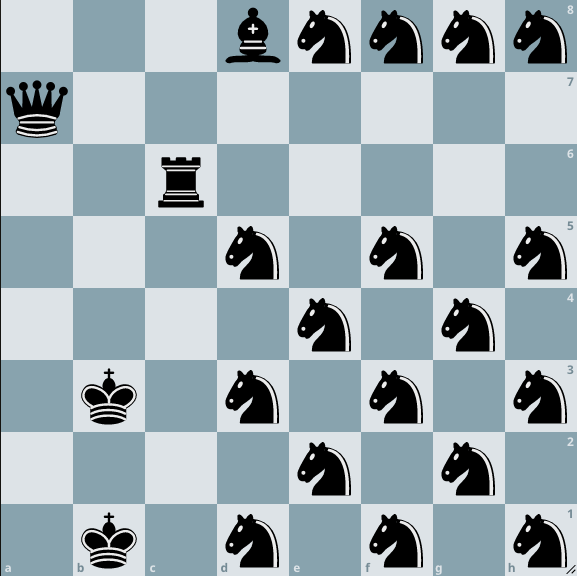

As you can clearly interpret from the below figure, none of the pieces attack any other

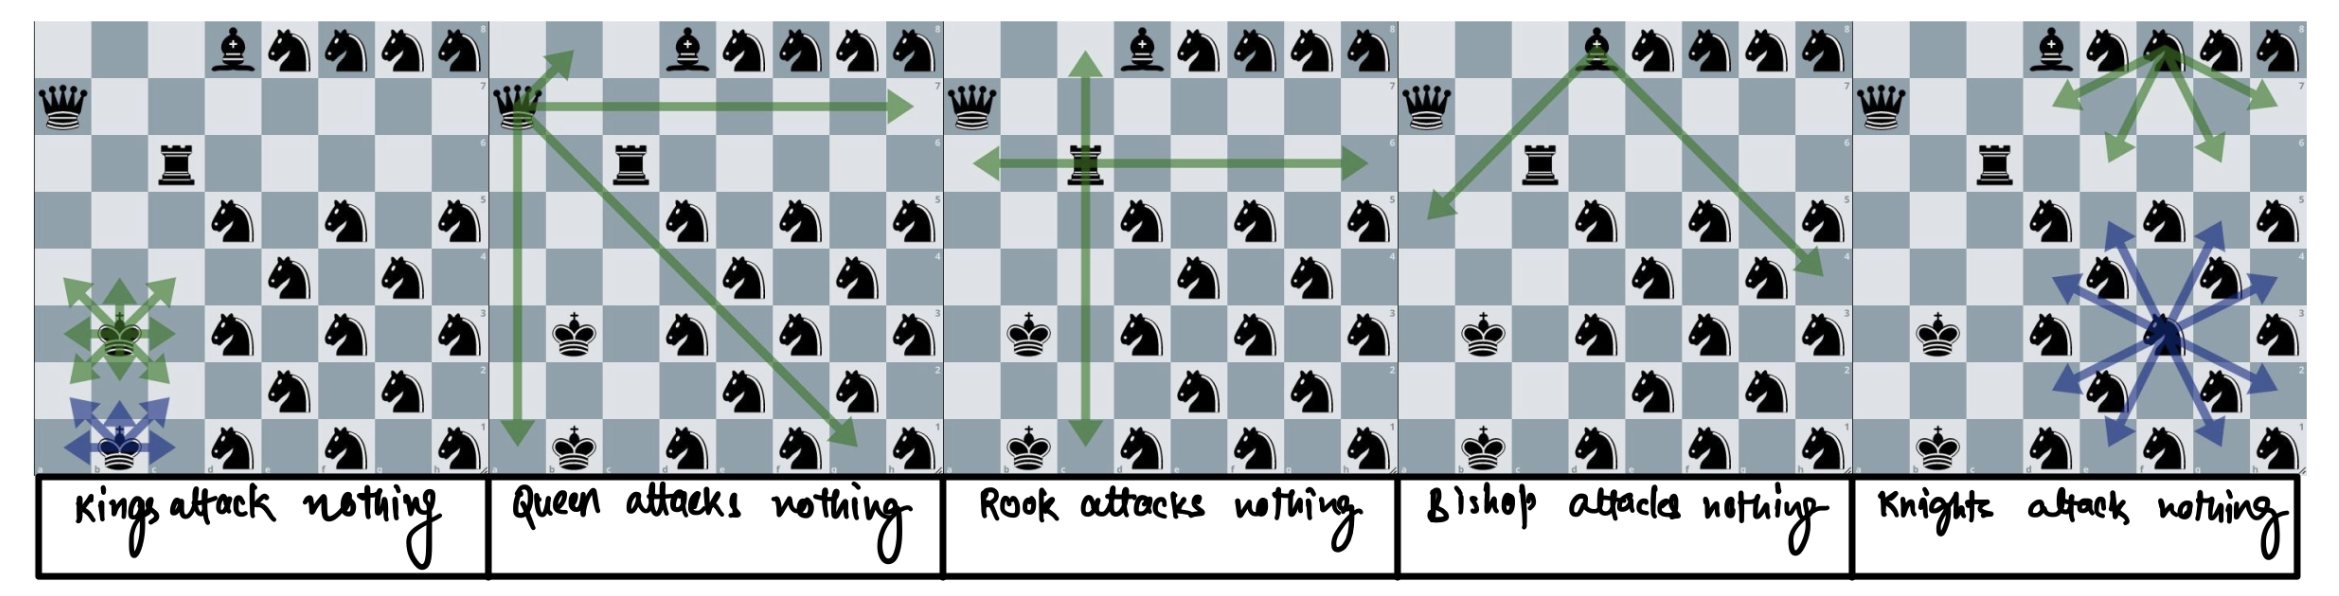

### 4.B Derived

For our derived problem, we allow unlimited supply of a particular piece, and zero supply of rest of the pieces and try to fit maximum pieces on the board. This leads to 5 sample scenarios (for each piece type) on a standard 8x8 board -


#### 4.B.a) Max-knights

Place maximum number of knights on a chess board such that no knight attacks any other. For this, we can update our data as follows

- min_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K => 0), and
- max_pieces = Dict(:N => N*N, :B => 0, :R => 0, :Q => 0, :K => 0), 

we get the following results

In [6]:
#initialize data
N = 8
pieces = [:N, :B, :R, :Q, :K]
min_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K => 0)
max_pieces = Dict(:N => N*N, :B => 0, :R => 0, :Q => 0, :K => 0)
;

In [7]:
# create & solve derived model
best_result, knights, bishops, rooks, queens, kings = create_and_solve_model(N, min_pieces, max_pieces);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-14
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 549 rows, 869 columns and 1525 nonzeros
Model fingerprint: 0x2e986ef2
Model has 640 general constraints
Variable types: 5 continuous, 864 integer (720 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [2e+00, 6e+01]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 485 rows and 805 columns
Presolve time: 0.02s
Presolved: 64 rows, 64 columns, 400 nonzeros
Variable types: 0 continuous, 64 integer (64 binary)
Found heuristic solution: objective 24.0000000

Root relaxation: objective 3.285401e+01, 83 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Cu

In [8]:
println("Thus, on a standard 8x8 chessboard, one can place ", best_result, " knights such that no knight attacks any other, in the following manner - ")
for i in 3:N+2
    for j in 3:N+2   
        if knights[i, j] == 1
            print("N,")
        elseif bishops[i, j] == 1
            print("B,")
        elseif rooks[i, j] == 1
            print("R,")
        elseif queens[i, j] == 1
            print("Q,")
        elseif kings[i, j] == 1
            print("K,")
        else
            print("-,")
        end
    end
    println()
end

Thus, on a standard 8x8 chessboard, one can place 32 knights such that no knight attacks any other, in the following manner - 
-,N,-,N,-,N,-,N,
N,-,N,-,N,-,N,-,
-,N,-,N,-,N,-,N,
N,-,N,-,N,-,N,-,
-,N,-,N,-,N,-,N,
N,-,N,-,N,-,N,-,
-,N,-,N,-,N,-,N,
N,-,N,-,N,-,N,-,


This board can be visualized as follows -
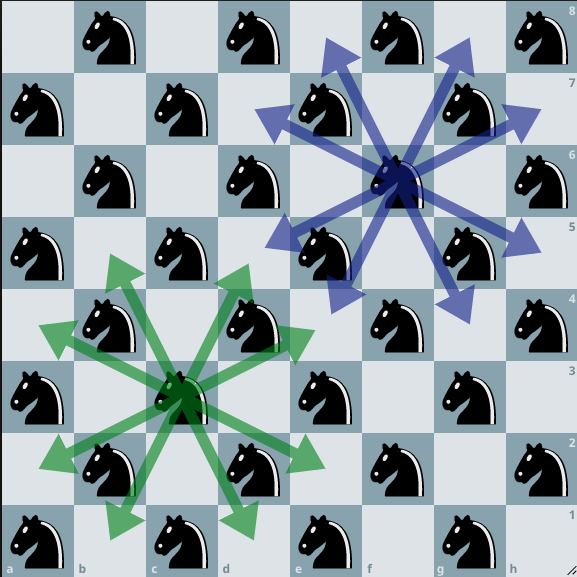

As you can clearly interpret from the figure above, none of the knights attack any other.

#### 4.B.b) Max-bishops

Place maximum number of bishops on a chess board such that no bishop attacks any other. For this, we can update our data as follows

- min_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K => 0), and
- max_pieces = Dict(:N => 0, :B => N*N, :R => 0, :Q => 0, :K => 0), 

we get the following results

In [9]:
#initialize data
N = 8
pieces = [:N, :B, :R, :Q, :K]
min_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K => 0)
max_pieces = Dict(:N => 0, :B => N*N, :R => 0, :Q => 0, :K => 0)
;

In [10]:
# create & solve derived model
best_result, knights, bishops, rooks, queens, kings = create_and_solve_model(N, min_pieces, max_pieces);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-14
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 549 rows, 869 columns and 1525 nonzeros
Model fingerprint: 0x42e65e3e
Model has 640 general constraints
Variable types: 5 continuous, 864 integer (720 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [2e+00, 6e+01]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 537 rows and 845 columns
Presolve time: 0.04s
Presolved: 12 rows, 24 columns, 48 nonzeros
Found heuristic solution: objective 13.0000000
Variable types: 0 continuous, 24 integer (24 binary)

Root relaxation: objective 1.400000e+01, 5 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Curr

In [11]:
println("Thus, on a standard 8x8 chessboard, one can place ", best_result, " bishops such that no bishop attacks any other, in the following manner - ")
for i in 3:N+2
    for j in 3:N+2   
        if knights[i, j] == 1
            print("N,")
        elseif bishops[i, j] == 1
            print("B,")
        elseif rooks[i, j] == 1
            print("R,")
        elseif queens[i, j] == 1
            print("Q,")
        elseif kings[i, j] == 1
            print("K,")
        else
            print("-,")
        end
    end
    println()
end

Thus, on a standard 8x8 chessboard, one can place 14 bishops such that no bishop attacks any other, in the following manner - 
B,-,B,B,B,B,B,-,
B,-,-,-,-,-,-,-,
-,-,-,-,-,-,-,-,
-,-,-,-,-,-,-,-,
-,-,-,-,-,-,-,-,
-,-,-,-,-,-,-,-,
-,-,-,-,-,-,-,B,
B,B,B,B,B,B,-,-,


This board can be visualized as follows -
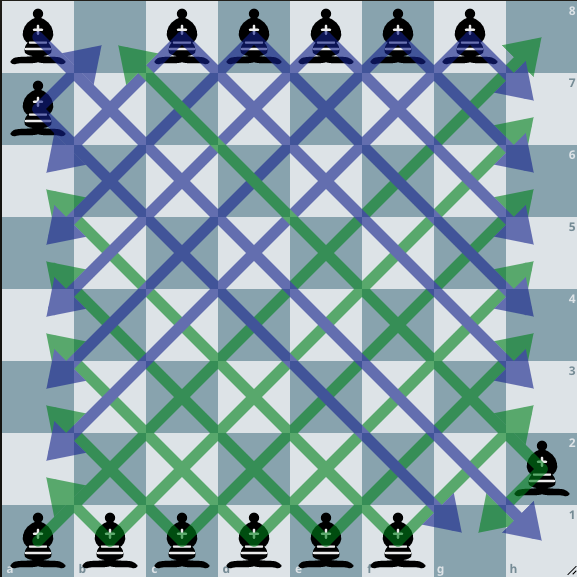

As you can clearly interpret from the figure above, none of the bishops attack any other.

#### 4.B.c) Max-rooks

Place maximum number of rooks on a chess board such that no rook attacks any other. For this, we can update our data as follows

- min_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K => 0), and
- max_pieces = Dict(:N => 0, :B => 0, :R => N*N, :Q => 0, :K => 0), 

we get the following results

In [12]:
#initialize data
N = 8
pieces = [:N, :B, :R, :Q, :K]
min_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K => 0)
max_pieces = Dict(:N => 0, :B => 0, :R => N*N, :Q => 0, :K => 0)
;

In [13]:
# create & solve derived model
best_result, knights, bishops, rooks, queens, kings = create_and_solve_model(N, min_pieces, max_pieces);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-14
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 549 rows, 869 columns and 1525 nonzeros
Model fingerprint: 0x59b1ba3d
Model has 640 general constraints
Variable types: 5 continuous, 864 integer (720 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [2e+00, 6e+01]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 405 rows and 789 columns
Presolve time: 0.01s
Presolved: 144 rows, 80 columns, 400 nonzeros
Variable types: 0 continuous, 80 integer (64 binary)
Found heuristic solution: objective 8.0000000

Root relaxation: objective 3.200000e+01, 86 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Cu

In [14]:
println("Thus, on a standard 8x8 chessboard, one can place ", best_result, " rooks such that no rook attacks any other, in the following manner - ")
for i in 3:N+2
    for j in 3:N+2   
        if knights[i, j] == 1
            print("N,")
        elseif bishops[i, j] == 1
            print("B,")
        elseif rooks[i, j] == 1
            print("R,")
        elseif queens[i, j] == 1
            print("Q,")
        elseif kings[i, j] == 1
            print("K,")
        else
            print("-,")
        end
    end
    println()
end

Thus, on a standard 8x8 chessboard, one can place 8 rooks such that no rook attacks any other, in the following manner - 
R,-,-,-,-,-,-,-,
-,R,-,-,-,-,-,-,
-,-,R,-,-,-,-,-,
-,-,-,R,-,-,-,-,
-,-,-,-,R,-,-,-,
-,-,-,-,-,R,-,-,
-,-,-,-,-,-,R,-,
-,-,-,-,-,-,-,R,


This board can be visualized as follows -
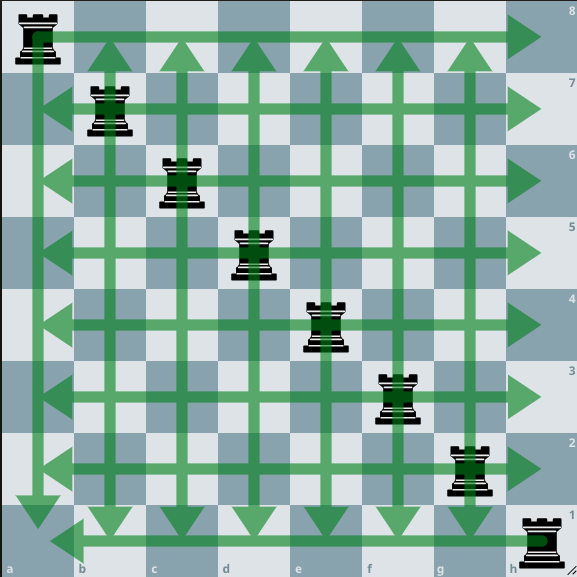
As you can clearly interpret from the figure above, none of the rooks attack any other.

#### 4.B.d) Max-queens (aka N-queens)

Place maximum number of queens on a chess board such that no queen attacks any other. For this, we can update our data as follows

- min_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K => 0), and
- max_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => N*N, :K => 0), 

we get the following results

In [15]:
#initialize data
N = 8
pieces = [:N, :B, :R, :Q, :K]
min_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K => 0)
max_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => N*N, :K => 0)
;

In [16]:
# create & solve derived model
best_result, knights, bishops, rooks, queens, kings = create_and_solve_model(N, min_pieces, max_pieces);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-14
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 549 rows, 869 columns and 1525 nonzeros
Model fingerprint: 0x16877ee1
Model has 640 general constraints
Variable types: 5 continuous, 864 integer (720 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [2e+00, 6e+01]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 379 rows and 789 columns
Presolve time: 0.06s
Presolved: 170 rows, 80 columns, 524 nonzeros
Variable types: 0 continuous, 80 integer (64 binary)
Found heuristic solution: objective 5.0000000

Root relaxation: objective 1.400000e+01, 63 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Cu

In [17]:
println("Thus, on a standard 8x8 chessboard, one can place ", best_result, " queens such that no queen attacks any other, in the following manner - ")
for i in 3:N+2
    for j in 3:N+2   
        if knights[i, j] == 1
            print("N,")
        elseif bishops[i, j] == 1
            print("B,")
        elseif rooks[i, j] == 1
            print("R,")
        elseif queens[i, j] == 1
            print("Q,")
        elseif kings[i, j] == 1
            print("K,")
        else
            print("-,")
        end
    end
    println()
end

Thus, on a standard 8x8 chessboard, one can place 8 queens such that no queen attacks any other, in the following manner - 
-,-,Q,-,-,-,-,-,
-,-,-,-,-,Q,-,-,
-,-,-,Q,-,-,-,-,
Q,-,-,-,-,-,-,-,
-,-,-,-,-,-,-,Q,
-,-,-,-,Q,-,-,-,
-,-,-,-,-,-,Q,-,
-,Q,-,-,-,-,-,-,


This board can be visualized as follows -
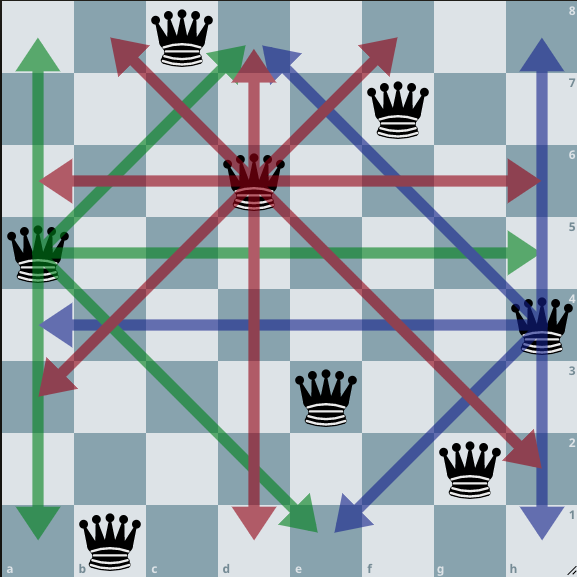
As you can clearly interpret from the figure above, none of the queens attack any other.

#### 4.B.e) Max-kings

Place maximum number of kings on a chess board such that no king attacks any other. For this, we can update our data as follows

- min_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K => 0), and
- max_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K => N*N), 

we get the following results

In [18]:
#initialize data
N = 8
pieces = [:N, :B, :R, :Q, :K]
min_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K => 0)
max_pieces = Dict(:N => 0, :B => 0, :R => 0, :Q => 0, :K =>  N*N)
;

In [19]:
# create & solve derived model
best_result, knights, bishops, rooks, queens, kings = create_and_solve_model(N, min_pieces, max_pieces);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-14
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 549 rows, 869 columns and 1525 nonzeros
Model fingerprint: 0x3c0e0b05
Model has 640 general constraints
Variable types: 5 continuous, 864 integer (720 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [2e+00, 6e+01]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 549 rows and 869 columns
Presolve time: 0.02s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.01 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: 16 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.60000

In [20]:
println("Thus, on a standard 8x8 chessboard, one can place ", best_result, " kings such that no king attacks any other, in the following manner - ")
for i in 3:N+2
    for j in 3:N+2   
        if knights[i, j] == 1
            print("N,")
        elseif bishops[i, j] == 1
            print("B,")
        elseif rooks[i, j] == 1
            print("R,")
        elseif queens[i, j] == 1
            print("Q,")
        elseif kings[i, j] == 1
            print("K,")
        else
            print("-,")
        end
    end
    println()
end

Thus, on a standard 8x8 chessboard, one can place 16 kings such that no king attacks any other, in the following manner - 
K,-,K,-,-,K,-,K,
-,-,-,-,-,-,-,-,
K,-,K,-,-,K,-,K,
-,-,-,-,-,-,-,-,
-,-,-,-,-,-,-,-,
K,-,-,K,-,K,-,K,
-,-,-,-,-,-,-,-,
K,-,K,-,-,K,-,K,


This board can be visualized as follows -
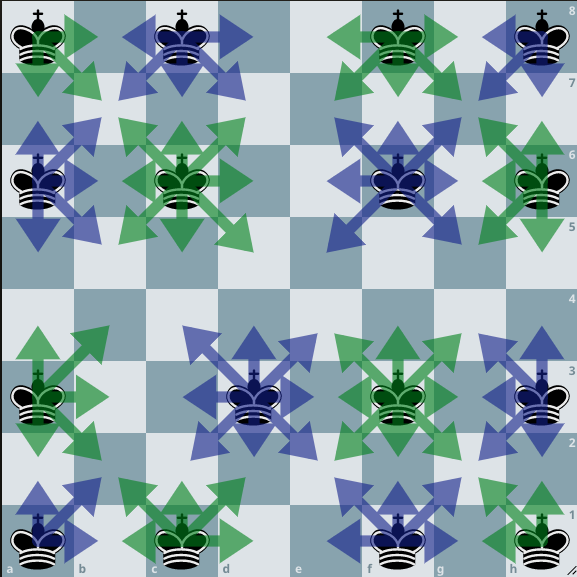
As you can clearly interpret from the figure above, none of the kings attack any other.

#### Limitations of the model

While our model perfectly solves the problem(s) at hand, one can not use it to place pieces on a preset chessboard, nor can it solve regular chess positions. However, we believe one can do all this by modifying the objective and constraints of the model.

## 5. Conclusion ##

Our project discusses a generalized MIP model to optimize the maximum number of chess pieces that one can place on a$(N*N)$ chess board along with their location so that no piece threatens any other piece.

While this report calculates the maximum number of chess pieces that can be placed on a$(N*N)$ chess board, we can extend our follow-up project in the future to calculate the maximum number of chess pieces on a preset chess board
This can be conducted by adding more constraints which demonstrates the preset chess board.

Moreover, in future, we hope to build a small chess engine that can be used to solve simple chess positions such as checkmate in one move. We couldn't do this in this project due to time restrictions as it requires color-dependency constraints as well special chess move constraints (such as <a href="https://en.wikipedia.org/wiki/En_passant"> en-passant</a> , <a href="https://en.wikipedia.org/wiki/Castling#:~:text=Castling%20is%20a%20move%20in,that%20the%20king%20passed%20over."> castling</a>, etc). 